# はじめに
matplotlib（とnumpy）の基本的な使い方及びアニメーションの作り方を説明します。matplotlibはpythonプログラム言語をベースとした解析・可視化ライブラリで、IDLと比べてライセンスフリーで使えるため、手頃な解析環境として人気があります。

jupyter notebookは、pythonプログラミング及びmatplotlibによる可視化などのチュートリアル／ハンズオンのための便利なツールとして知られています。本notebookはjupyter notebookのセットアップができている環境下で動作します。

以下ではCANS+ のデータ読み込み、それらの可視化機能、解析手法の紹介をします。以下で使われるプロシージャの一部は\$CANSPLUS_DIR/python内に用意されています。これらは各課題から共通して使えるものです。

# python環境の準備    
## インストール
anaconda3をインストールするのがお手軽です。    
https://www.anaconda.com/download/
よりバイナリファイルをダウンロードして、圧縮ファイルをインストール先に展開してください。    
本サマーセミナーでは、すでにanaconda3がインストールされています。

## 環境設定
anaconda3をインストールした先を以下では ~/anaconda3 とします。

bashの場合、
```bash
export PATH=~/anaconda3:$PATH
```

tcshの場合、

```csh
setenv PATH ~/anaconda3:${PATH}
```

とすることで、anaconda3内のpythonを優先的に使うように設定します。これにより、OSに別途インストールされているpython環境と分けて使用します。
以上の設定は.bashrcや.tcshrcに書いておくとよいです。本サマーセミナーではすでに環境設定がされています。

In [1]:
import sys
print(sys.version)

3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]


のように出力されたら、インストールは正常に完了しています。試しにnumpyをインポートして利用してみましょう。

In [2]:
import numpy as np
data = np.array([1000,100.0,1])

In [3]:
print(data)

[1000.  100.    1.]


In [4]:
print(data.dtype)

float64


## jupyter notebookの起動
本notebookの利用方法は、
```console
$ jupyter-notebook matplotlib_hanbs-on.ipynb
```
で起動します。ブラウザが立ち上がり、ブラウザのページの中でコマンドをインタラクティブに実行していきます。

***セル内の改行は Enter キー、セル内の命令の実行は Shift + Enter キーで行います。***

# データの読み込み
## テキストファイルデータの読み込み

In [11]:
import numpy as np
import glob
list = glob.glob('*_vyi.dat')
data = np.loadtxt(list[0])

## バイナリデータ（IDL save file）の読み込み

In [6]:
import scipy.io as sio
data_set= sio.readsav('sample.dat')
data = data_set['data']
xax = data_set['x']
yax = data_set['y']

### 注意
多次元配列の場合、pythonでは、行・列の順に格納されます。これは、それぞれの次元がY軸、X軸に相当していて、IDLやFotranと異なることに注意が必要です。

---
# matplotlibを使った可視化
## matplotlibの使い方参考サイト
以下では、解析・可視化について基本的なところしか紹介しません。細かい調整等が必要な場合は下記のサイトが参考になると思いますので、適宜参照してください。

* https://jakevdp.github.io/PythonDataScienceHandbook/index.html
* http://www.turbare.net/transl/scipy-lecture-notes/intro/matplotlib/matplotlib.html
* http://seesaawiki.jp/met-python/d/matplotlib

## モジュールのインポート
まずはmatplotlibのモジュールをインポートします。おまじないだと思ってください。

In [7]:
import matplotlib.pyplot as plt

## 描画ウィンドウの表示方法
notebook内では、描画内容はセル内に表示されていますが、pythonのコマンドライン上では、最後に
``` python
 plt.show()
```
もしくは
``` python
 plt.pause(0.1)
```
のようにして、新しく立ち上がるウィンドウ内に描画します。    

前者と後者の方法の違いは、前者はウィンドウにフォーカスされて、ウィンドウを閉じない限りコマンドラインに戻れないのに対して、後者ではウィンドウを立ち上げたままコマンドラインに戻ることができます。

ipythonを使うとjupyter notebookと同じように使えて、
``` console
$ ipython --pylab
```
のように--pylabオプションをつけてipythonを起動すれば、描画時に自動的にウィンドウが立ち上がります。

## 1次元プロット
線プロットの作り方です。１次元plotの詳しい使い方は?plt.plotより確認できます。

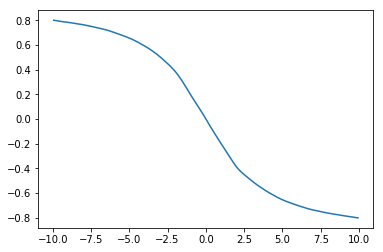

In [8]:
xpos1 = np.argmin(np.abs(xax-np.max(xax)/2))
plt.plot(yax,data[7,:,xpos1])

軸にタイトルを入れたりして見栄えを変えます。

Text(0.5,1,'K-H instability')

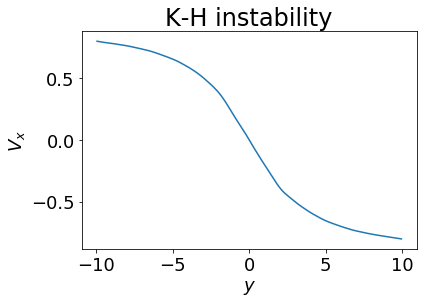

In [28]:
#デフォルトフォントサイズの設定
#個別に指定しない限りは以降この設定が反映される
plt.rcParams['font.size'] = 18
#軸のタイトル、タイトルの追加
plt.plot(yax,data[7,:,xpos1])
plt.xlabel('$y$')
plt.ylabel('$V_x$')
plt.title('K-H instability',fontsize=24)

別のデータのプロットを重ね描きして、レジェンドを追加します。

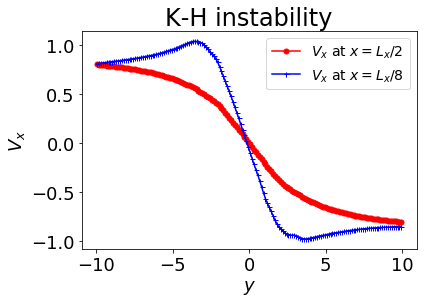

In [31]:
plt.plot(yax,data[7,:,xpos1],'ro-',markersize=5,label='$V_x$ at $x=L_x/2$')
xpos2 = np.argmin(np.abs(xax-np.max(xax)/8.))
plt.plot(yax,data[7,:,xpos2],'b+-',markersize=5,label='$V_x$ at $x=L_x/8$')
plt.title('K-H instability',fontsize=24)
plt.xlabel('$y$')
plt.ylabel('$V_x$')
plt.legend(loc='upper right',fontsize=14)

## 2次元マップ
### pcolormeshを使った方法

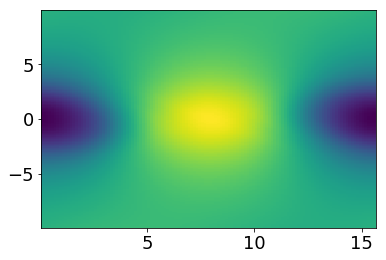

In [33]:
#x軸、y軸データから2次元データを作る
xax2d, yax2d = np.meshgrid(xax,yax)
plt.pcolormesh(xax2d,yax2d,data[5,:,:])

軸タイトルやデータに基づくアスペクト比の変更、カラーバーを追加するなどして見栄えを整えます。

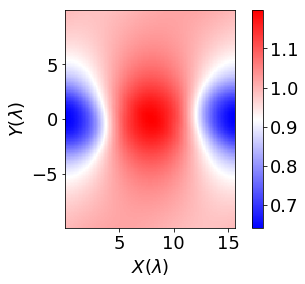

In [41]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='bwr')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
##図のアスペクト比を軸データを元に決める
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

カラーマップは https://matplotlib.org/examples/color/colormaps_reference.html を参考に指定してください。

# ベクトル場の表示
## ベクトル矢印による表現 (quiver）
上記で作成した2次元 カラー図 に速度場ベクトルを付け加える場合を例に示します。

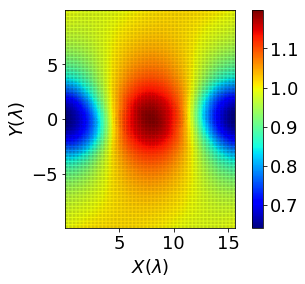

In [42]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.quiver(xax2d,yax2d,data[7,:,:],data[8,:,:])

しかし、そのままだと全ての情報を矢印で描くことになってしまうので、サンプリングして描画するように修正する。

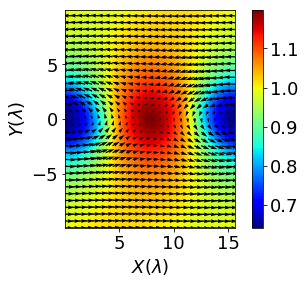

In [43]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
#配列要素を5つ飛ばしで描画（::5）
plt.quiver(xax2d[::5,::5],yax2d[::5,::5],data[7,::5,::5],data[8,::5,::5],scale=np.max(xax),width=0.0075)

## 流線による表現（streamplot）
矢印だとうまく表現できない場合もあるので、別の方法を紹介します。

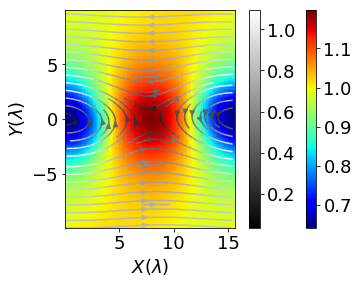

In [44]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
#配列要素を3つ飛ばしで描画（::3）
plt.streamplot(xax2d[::3,::3],yax2d[::3,::3],data[7,::3,::3],data[8,::3,::3],color=np.sqrt(data[7,::3,::3]**2+data[8,::3,::3]**2),cmap='binary_r')
#ベクトル場の大きさで流線の色をつける
plt.colorbar()

# 等高線
磁力線を描く（ベクトルポテンシャルの等高線）ためには、等高線を図示するのが便利です。例えば、上記で作成した2次元 カラー図 に質量密度の等高線を描き加える（この例では圧力分布とほぼ同じ）場合を以下で示します。

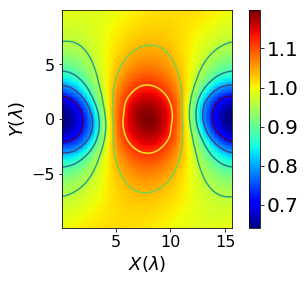

In [16]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$',fontsize=18)
plt.ylabel('$Y (\lambda)$',fontsize=18)
plt.tick_params(labelsize=16)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.contour(xax2d,yax2d,data[5,:,:])

等高線の数を増やす場合は、

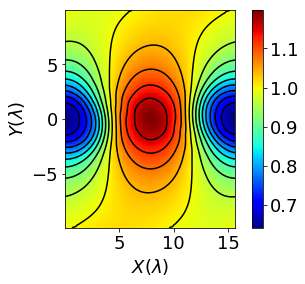

In [47]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.contour(xax2d,yax2d,data[5,:,:],15,colors='black')

# 結果のファイルへの出力
上記2次元マップで作成した図をファイルに保存するには、それぞれのクラスに共通したsaveメソッドを使ってファイルに保存します。ファイル名の拡張子からファイルフォーマットが自動的に決まります。

In [49]:
plt.pcolormesh(xax2d,yax2d,data[5,:,:],cmap='jet')
plt.xlabel('$X (\lambda)$')
plt.ylabel('$Y (\lambda)$')
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.contour(xax2d,yax2d,data[5,:,:],15,colors='black')
#描画内容を保存 (解像度をDPI=150で指定)
plt.savefig('result_matplotlib.png',bbox_inches='tight',dpi=150)
plt.savefig('result_matplotlib.eps',bbox_inches='tight')
plt.close()

## アニメーションの作り方
以下の様に、python上で結果をpngファイルとして保存します。

In [19]:
data_set = sio.readsav('sample_ro-time.dat')
ro = data_set['ro']
nt = ro.shape[0]
for l in range(0,nt):
    plt.pcolormesh(xax2d,yax2d,ro[l,:,:],cmap='jet')
    plt.xlabel('$X (\lambda)$')
    plt.ylabel('$Y (\lambda)$')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.colorbar()
    plt.savefig('result_matplotlib'+str(l).zfill(3)+'.png',bbox_inches='tight',dpi=150)
    plt.close()

上記のようにすると、作業ディレクトリには”result_matplotlib005.png”のように連番でファイル名が付けられた画像ファイルが作成されます。

結果をpngファイルに出力後、LinuxにインストールされているImagemagick (convert)やffmpegを使って、結果の図をアニメーション化します。まず、convertを使った方法を説明します。

```console
$ convert result???.png result.gif
```
のようにすると、gifアニメーションが作成されます。convertの際の詳しいオプションは”man convert”に委ねます。

次に、ffmpegを使ったアニメーション作成例を示します。
```console
$ ffmpeg -r 10 -i result_matplotlib%03d.png -qscale 0 -vcodec mpeg4 result.mp4
```
のように、gifアニメーション以外のフォーマット（この例では、元の画像と同じ画質で、エンコードにmpeg4、格納形式としてmp4を指定している）の動画ファイルが作成可能です。更なるオプションは”man ffmpeg”に委ねます。